# demo GIF process

In [128]:
import os
import numpy as np
from matplotlib.widgets import RectangleSelector
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from pprint import pprint
from collections import OrderedDict

## draw the boxes

In [138]:
os.chdir('/Users/apple/Desktop/AI Acadamy/project/programe/OpenLabeling/bbox_txt/')
!pwd

/Users/apple/Desktop/AI Acadamy/project/programe/OpenLabeling/bbox_txt


In [157]:
## extract the coordinate from the text ##

## transform string into coordinate
def yolo_to_x_y(x_center, y_center, x_width, y_height, width, height):
    x_center *= width
    y_center *= height
    x_width *= width
    y_height *= height
    x_width /= 2.0
    y_height /= 2.0
    return int(x_center - x_width), int(y_center - y_height), int(x_center + x_width), int(y_center + y_height)

## output the coordinate and the class as a tuple
def output_class_coor(ls):
    with open(ls, 'r') as text_file:
        coor = text_file.readlines()
        if len(coor) == 0:
            return None
        else:
            item_info = []
            for item in coor:
                item = item.strip()
                item = item.split(' ')
                class_index, x_center, y_center, x_width, y_height = map(float, item)
                cls = class_index
                bboxx1, bboxy1, bboxx2, bboxy2 = yolo_to_x_y(x_center, y_center, x_width, y_height, 1280, 720)
                lb = (bboxx1, bboxy1)
                rt = (bboxx2, bboxy2)
                item_info.append((cls, lb, rt))
            return item_info

In [158]:
## extract the coordinate from the text ##
bbox_path = '/Users/apple/Desktop/AI Acadamy/project/programe/OpenLabeling/bbox_txt/'
os.chdir(bbox_path)
label_list = os.listdir(bbox_path)
pic_info = OrderedDict()
for i, ls in enumerate(label_list):
    if 'txt' in ls:
        img_name = ls[:10]
        pic_info[img_name] = list()
        info = output_class_coor(ls)
        if info != None:
            pic_info[img_name] = info

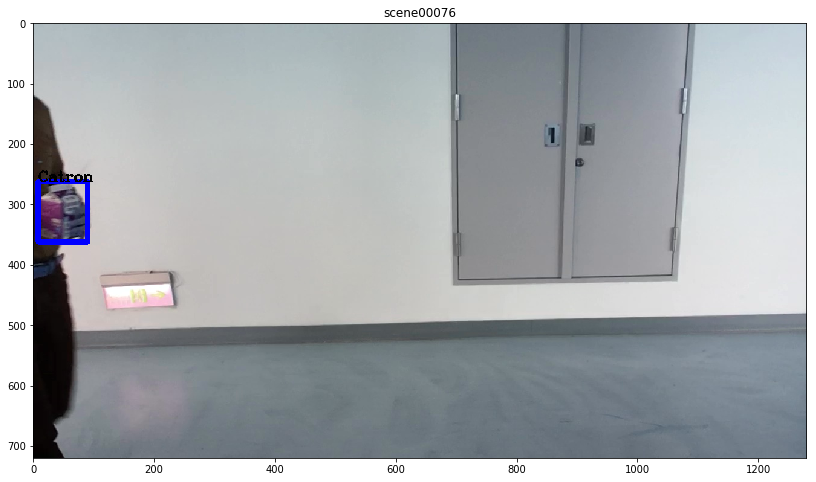

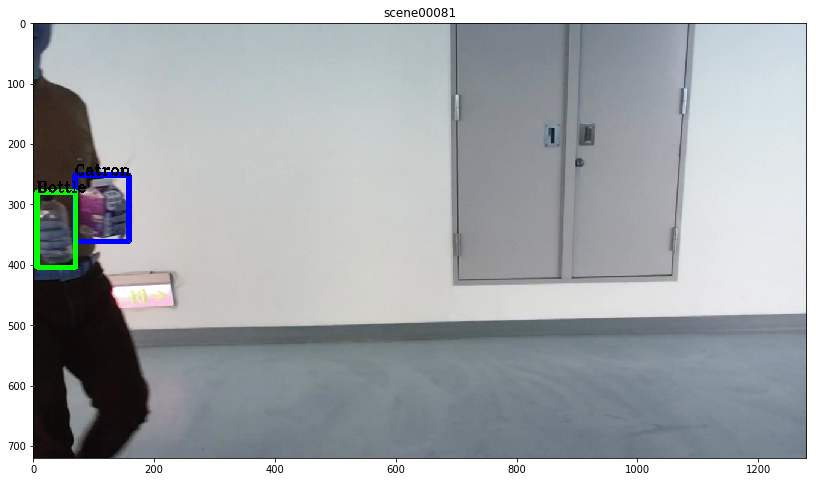

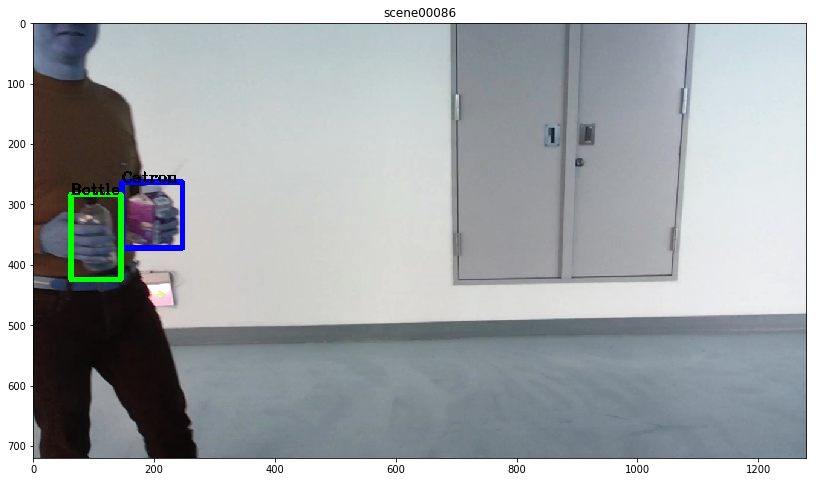

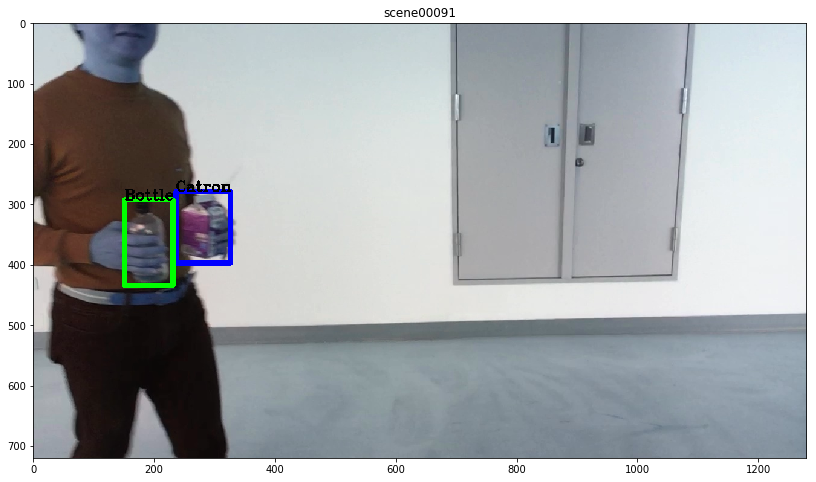

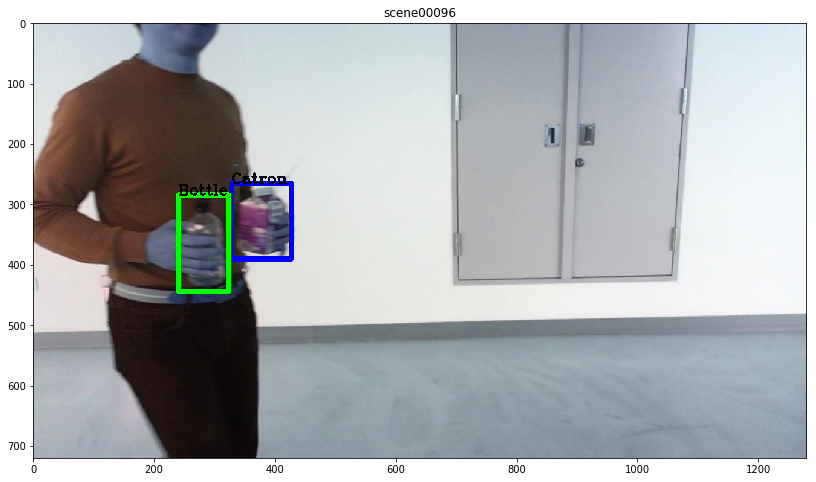

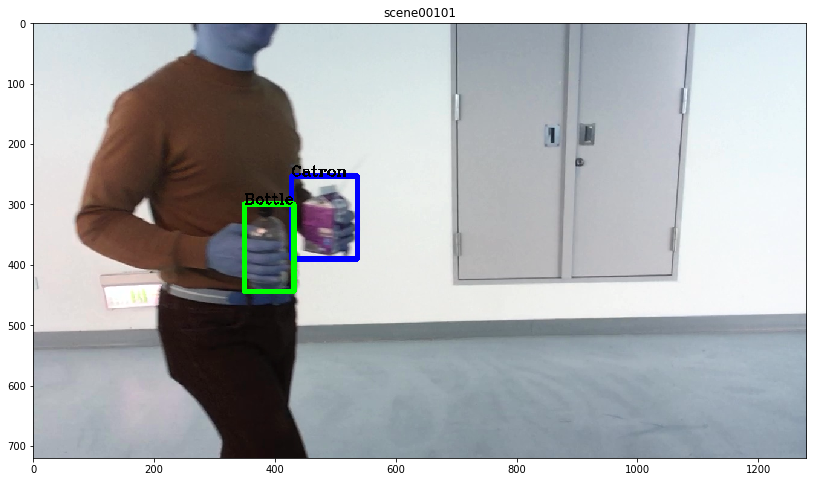

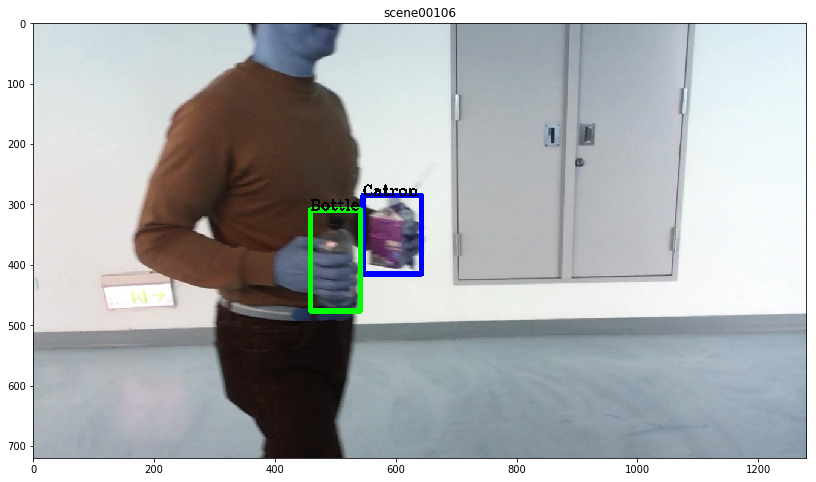

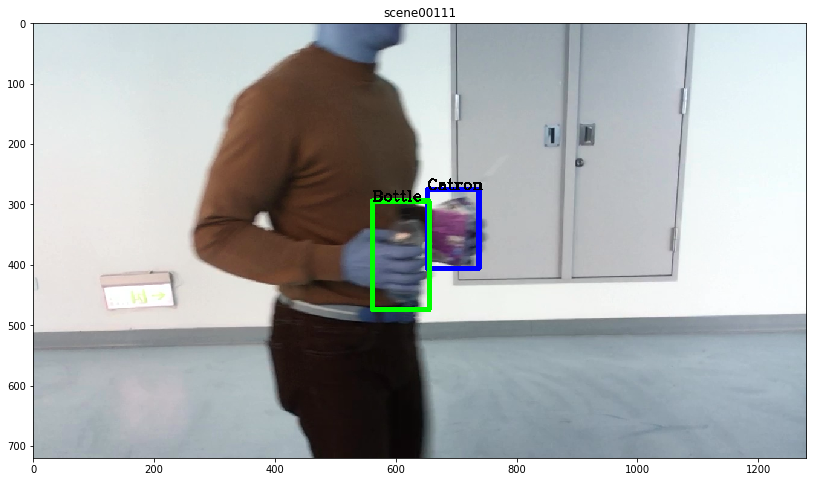

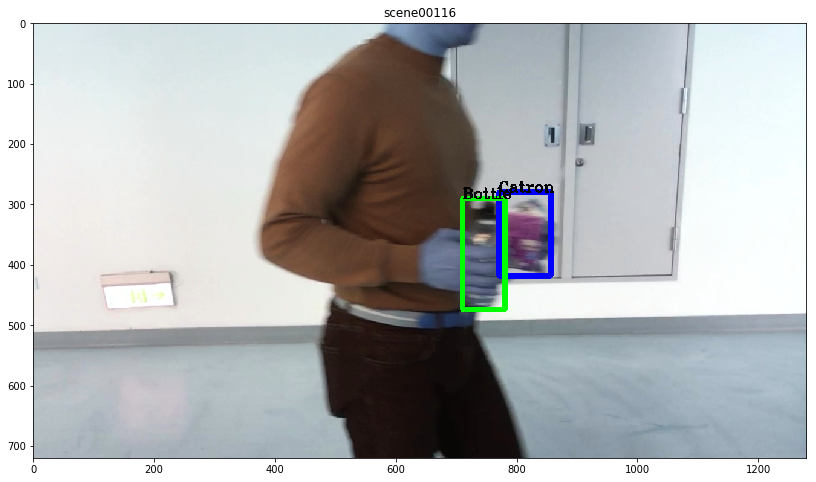

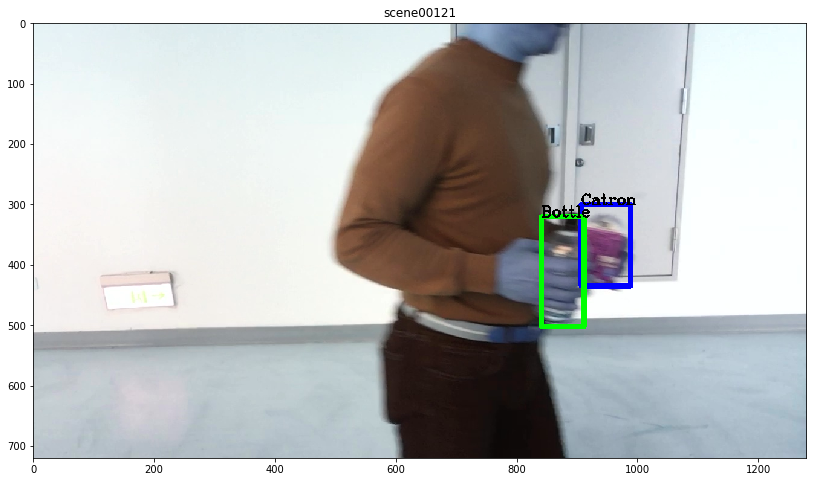

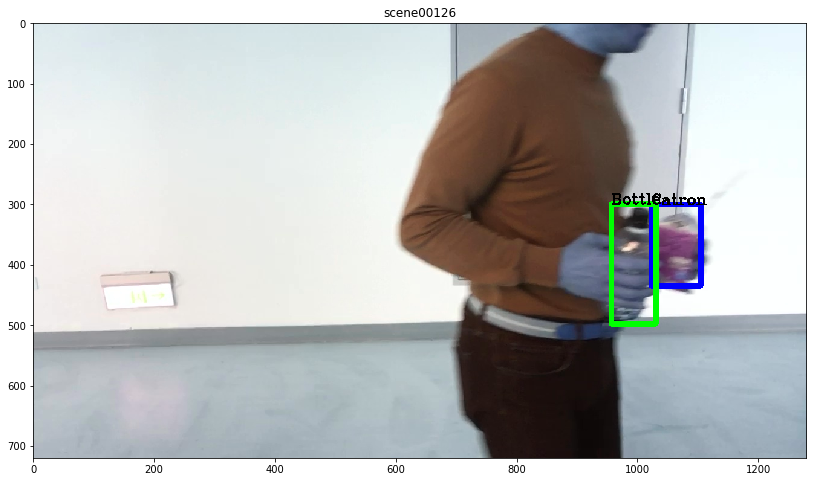

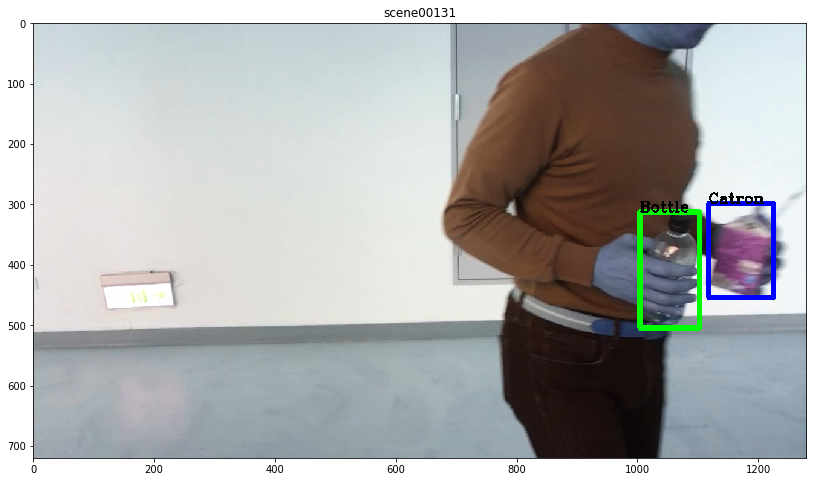

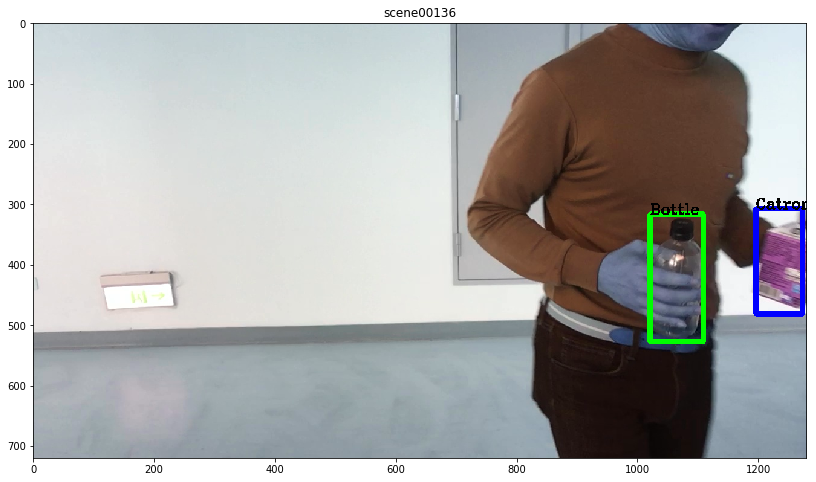

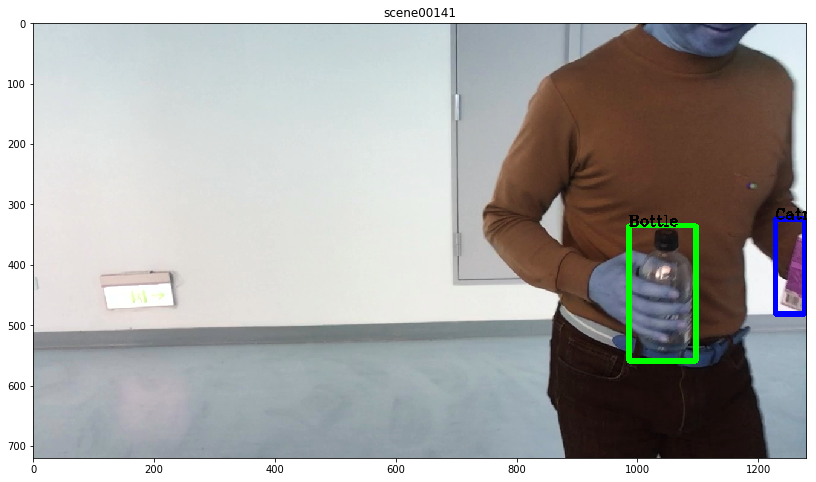

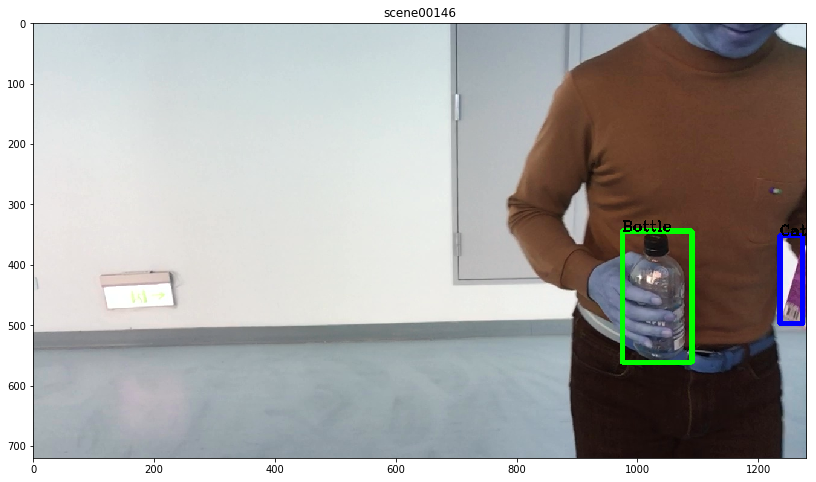

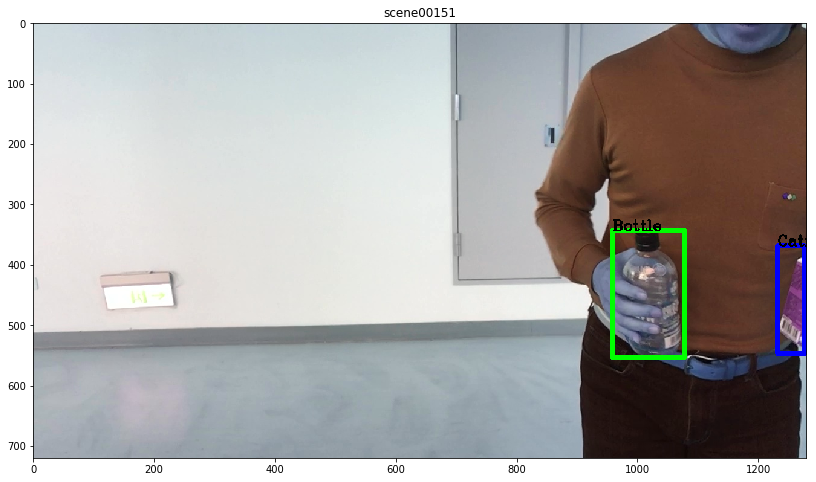

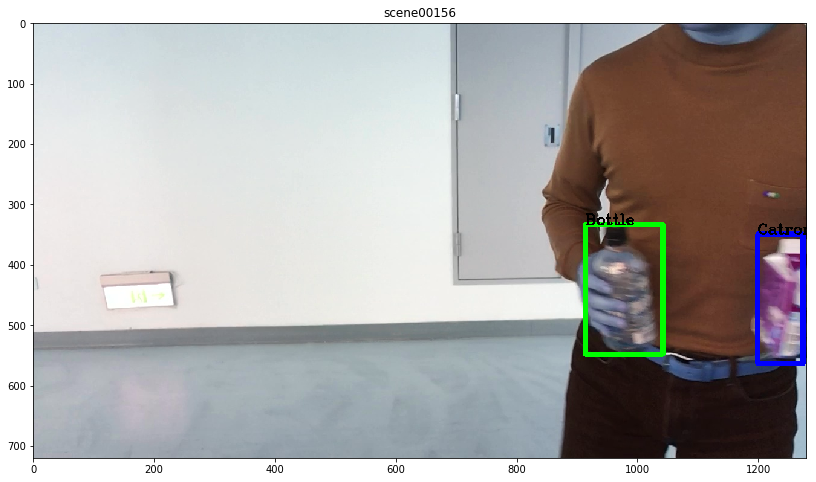

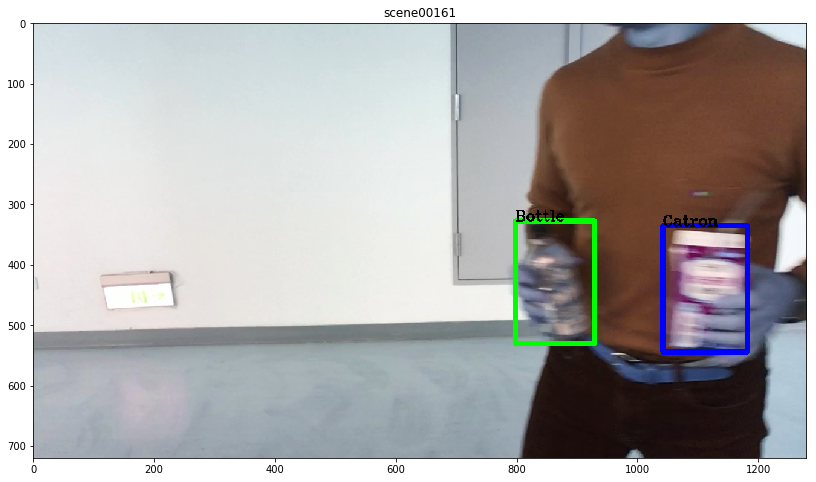

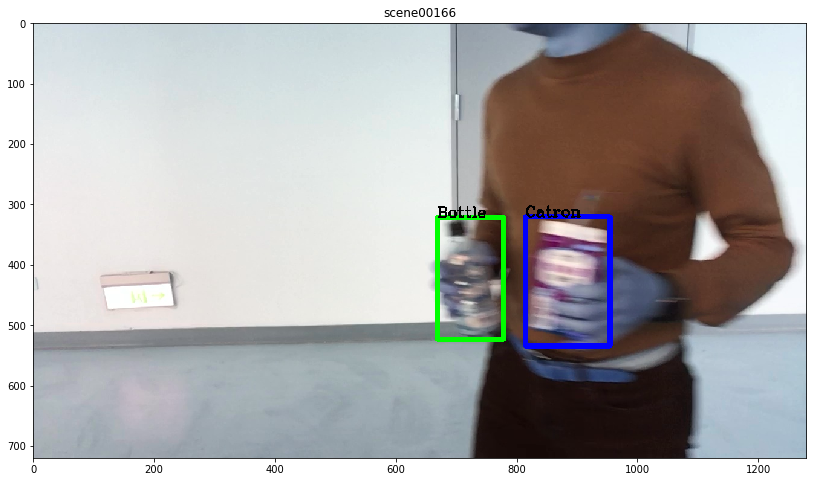

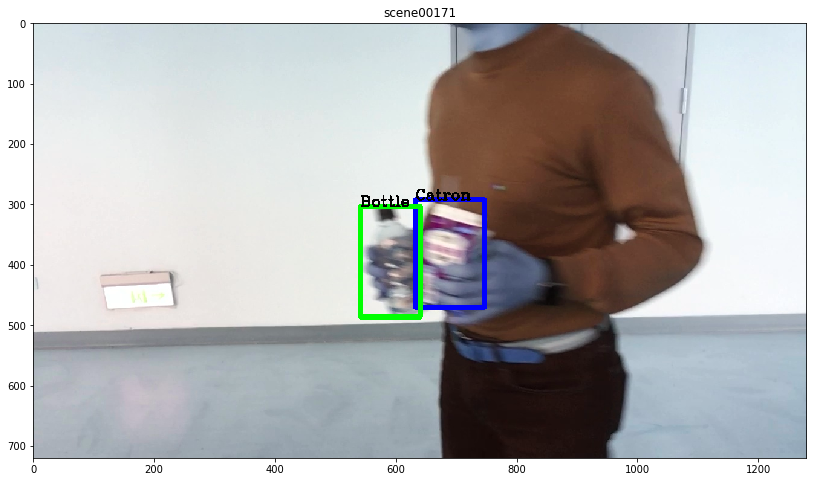

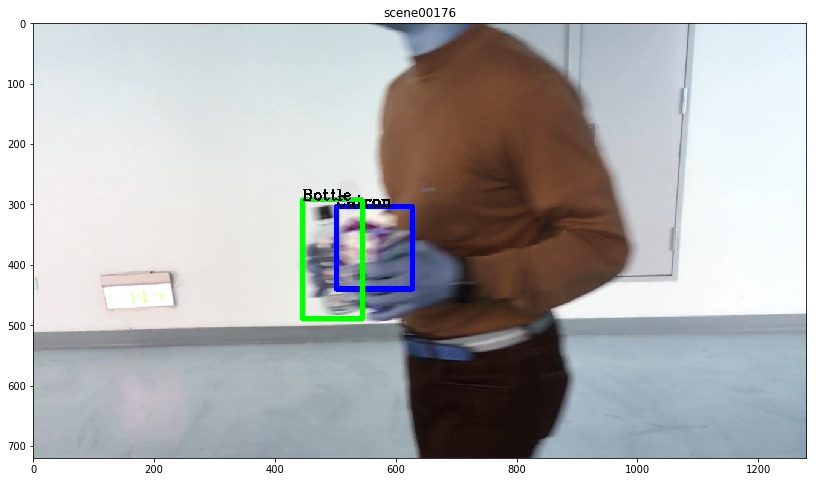

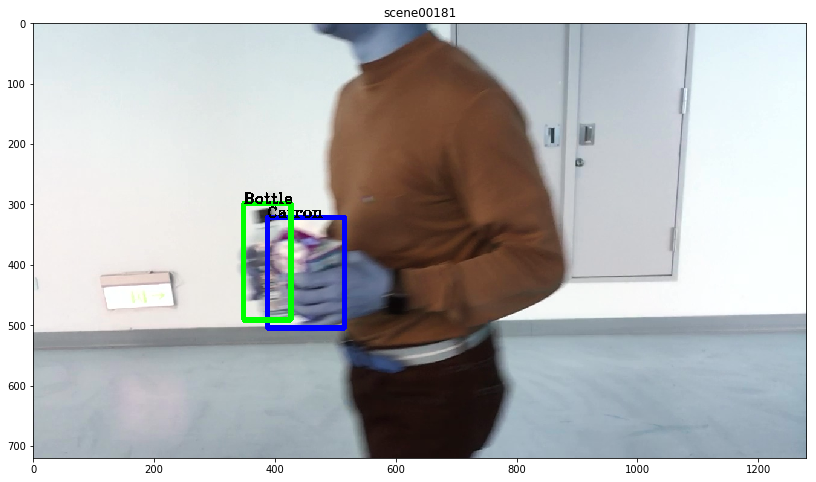

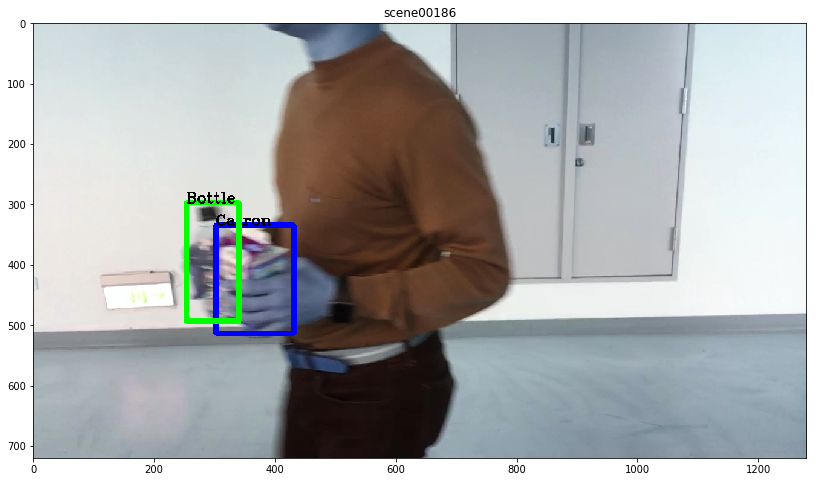

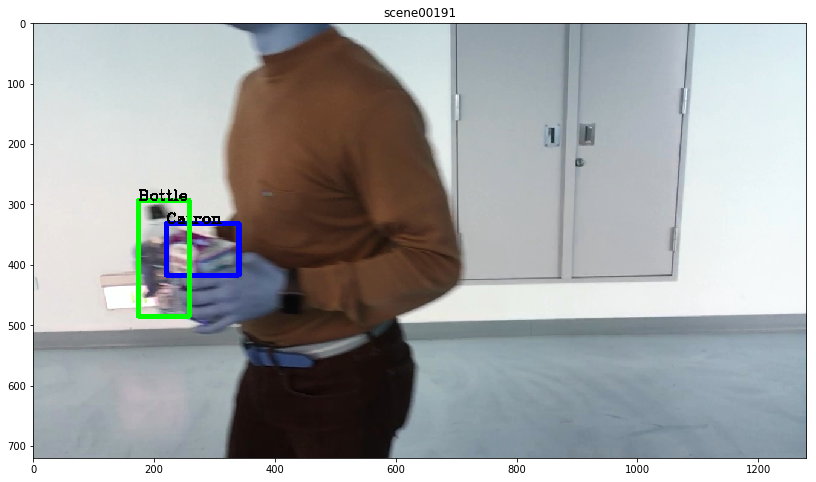

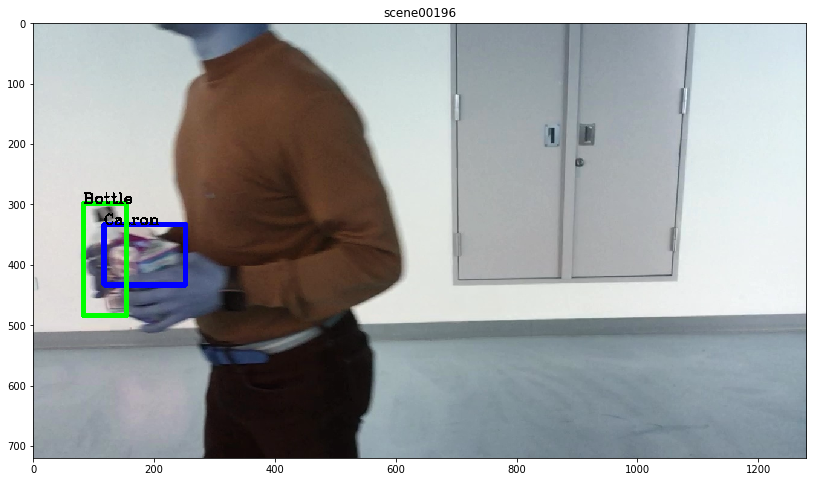

In [168]:
## mark rectangular on the image ##
img_dir = '/Users/apple/Desktop/AI Acadamy/project/programe/OpenLabeling/images/'
os.chdir(img_dir)
out = cv2.VideoWriter('demo_2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (1280,720))  ## create a video 

for img_name in sorted(pic_info):
    path = os.path.join(img_dir, img_name + '.jpg')
    img = cv2.imread(path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if pic_info[img_name] != []:
        for i in range(len(pic_info[img_name])):
            lb = pic_info[img_name][i][1]   ## coordinate top left
            rt = pic_info[img_name][i][2]   ## coordinate bottom right    
            label = 'Bottle' if pic_info[img_name][i][0] == 0 else 'Catron'  ## Labeling 
            color = (0, 255, 0) if pic_info[img_name][i][0] == 0 else (0, 0, 255)  ## select the color 
            img = cv2.rectangle(img, lb, rt, color, 7)
            img = cv2.putText(img, label, lb, cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 0, 0), 2)
    
    out.write(img)  ## write image frame by frame to create video
    plt.figure(figsize = (15,8))
    plt.title(img_name)
    plt.imshow(img)
    plt.show()
    
out.release()